In [1]:
%load_ext autoreload
%autoreload 2
from train import train_till_convergence

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

In [3]:
# Default hyperparameters
d = 400
n = 200
m = 64
corruption_rate = 0.1
gamma = 0.1

100%|██████████| 11/11 [46:13<00:00, 252.17s/it]


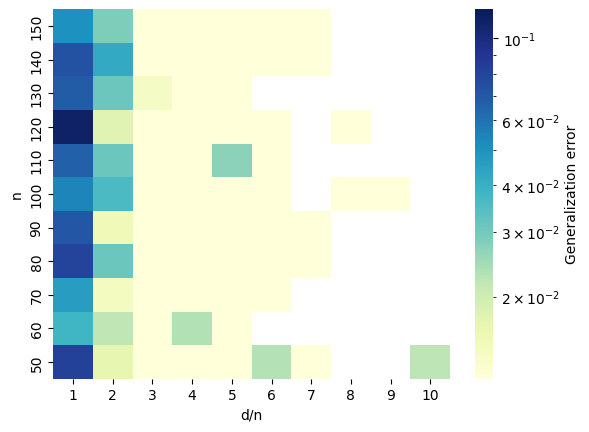

In [5]:
# Generate heatmaps
from matplotlib.colors import LogNorm

n_values = []
d_over_n_values = []
generalization_error_values = []
sample_size = 5
for n in tqdm(np.arange(50, 160, 10)):
    for d_over_n in np.arange(1, 11, 1):
        d = n * d_over_n
        total_generalization_error = 0
        for i in range(sample_size):
            _, generalization_error_sample = train_till_convergence(d, n, m, corruption_rate, 5/n, verbosity=-1)
            total_generalization_error += generalization_error_sample
        generalization_error = total_generalization_error / sample_size
        n_values.append(n)
        d_over_n_values.append(d_over_n)
        generalization_error_values.append(generalization_error)
df = pd.DataFrame({"n": n_values, "d/n": d_over_n_values, "generalization_error": generalization_error_values})
table = df.pivot(index="n", columns="d/n", values="generalization_error")

ax = sns.heatmap(table, norm=LogNorm(vmin=10e-3*1.2,vmax=10e-2*1.2), cmap="YlGnBu", cbar_kws={"label": "Generalization error"})
ax.invert_yaxis()

plt.show()
df.to_csv("d_over_n_heatmap.csv")

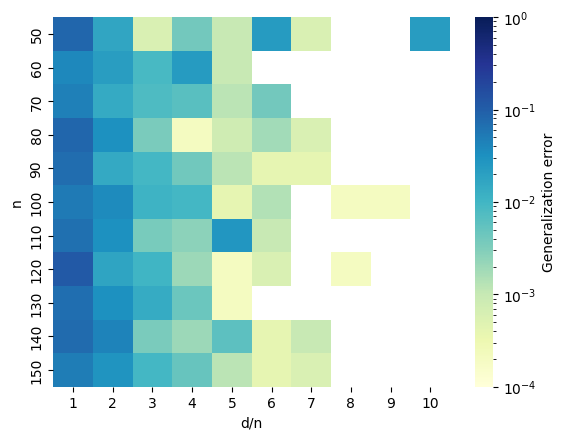

In [6]:
# Change color scale of heatmap
ax = sns.heatmap(table, norm=LogNorm(vmin=10e-5,vmax=10e-1), cmap="YlGnBu", cbar_kws={"label": "Generalization error"})

50


100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


100


100%|██████████| 10/10 [04:12<00:00, 25.25s/it]


150


100%|██████████| 10/10 [10:00<00:00, 60.09s/it]


200


100%|██████████| 10/10 [16:47<00:00, 100.74s/it]


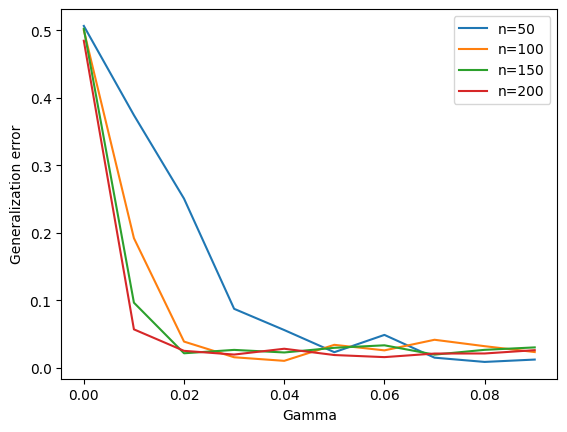

In [209]:
# Plot generalization error as a function of gamma
n = 50
d = 100
gamma_range = np.arange(0.0, 0.1, 0.01)
    

for n in [50, 100, 150, 200]:
    print(n)
    d = 2 * n
    generalization_error_values = []
    for gamma in tqdm(gamma_range):
        total_generalization_error = 0
        for i in range(10):
            _, generalization_error_sample = train_till_convergence(d, n, m, corruption_rate, gamma, verbosity=-1)
            total_generalization_error += generalization_error_sample
        generalization_error = total_generalization_error / 10
        generalization_error_values.append(generalization_error)
    plt.plot(gamma_range, generalization_error_values, label=f"n={n}")
plt.xlabel("Gamma")
plt.ylabel("Generalization error")
plt.legend()
plt.show()